In [421]:
import pandas as pd

# Função para tratar dados

In [422]:
def arruma_df(dataset):
    for text  in dataset.Estrelas:
        if(type(text)==str):
            dataset.Estrelas[dataset.Estrelas == text] = text.split()[0]
            
    dataset['Preço'] = dataset['Preço'].apply(lambda x: x.replace('R$ ','')).apply(lambda x: x.replace('.','')).apply(lambda x: x.replace(',','.'))
    dataset.Estrelas = dataset.Estrelas.str.replace(',','.')
    dataset.TotalReviews = dataset.TotalReviews.apply(lambda x: str(x).replace('.',''))
    
    # Transformando dados em numericos
    colunas_numerica = ['Preço','Estrelas','TotalReviews']
    dataset[colunas_numerica]=dataset[colunas_numerica].apply(pd.to_numeric, errors='coerce')
    
    return dataset

# Função para remover outliers

In [423]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices


# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)

def outliers_index_l(df):
    index_list = []
    for feature in ["Preço", "TotalReviews"]:
        index_list.extend(outliers_indexes(df, feature))
    outliers_index_list = outliers_indexes(df, 'Preço')
    print("Quantidade de outliers: ",len(outliers_index_list))
    
    return outliers_index_list
    
    
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df

# Tratando dados sobre notebooks

In [424]:
dados_notebook = pd.read_csv('output/dataset_notebook.csv',sep=';')
dados_notebook

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Headset com fio Logitech H151 com Microfone co...,"R$ 99,90","4,3 de 5 estrelas",3.579,https://www.amazon.com.br/gp/slredirect/picass...
1,Mouse Bluetooth para MacBook Pro/MacBook Air/L...,"R$ 80,98","4,4 de 5 estrelas",51,https://www.amazon.com.br/gp/slredirect/picass...
2,"Mouse Bluetooth recarregável para Mac, laptop,...","R$ 119,67","3,2 de 5 estrelas",6,https://www.amazon.com.br/gp/slredirect/picass...
3,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...","R$ 2.909,00","4,6 de 5 estrelas",199,https://www.amazon.com.br/Notebook-Lenovo-Ultr...
4,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,"R$ 3.229,99","4,7 de 5 estrelas",26,https://www.amazon.com.br/Lenovo-Ultrafino-S14...
...,...,...,...,...,...
959,"OSALADI – Suporte vertical para laptop, suport...","R$ 92,46","4,3 de 5 estrelas",10,https://www.amazon.com.br/OSALADI-Suporte-vert...
960,Kit Ferramentas Conjunto Abrir Iphone Celular ...,"R$ 49,99","4,6 de 5 estrelas",155,https://www.amazon.com.br/Ferramentas-Conjunto...
961,Tomshin V8H 2.4G sem fio mudo Mouse Plug & Pla...,"R$ 101,45",0,0,https://www.amazon.com.br/gp/slredirect/picass...
962,Tomshin 2.4G Mouse Sem Fio Portátil Ultra-Fino...,"R$ 58,35",0,0,https://www.amazon.com.br/gp/slredirect/picass...


In [425]:
arruma_df(dados_notebook)

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Headset com fio Logitech H151 com Microfone co...,99.90,4.3,3579.0,https://www.amazon.com.br/gp/slredirect/picass...
1,Mouse Bluetooth para MacBook Pro/MacBook Air/L...,80.98,4.4,51.0,https://www.amazon.com.br/gp/slredirect/picass...
2,"Mouse Bluetooth recarregável para Mac, laptop,...",119.67,3.2,6.0,https://www.amazon.com.br/gp/slredirect/picass...
3,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,4.6,199.0,https://www.amazon.com.br/Notebook-Lenovo-Ultr...
4,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,4.7,26.0,https://www.amazon.com.br/Lenovo-Ultrafino-S14...
...,...,...,...,...,...
959,"OSALADI – Suporte vertical para laptop, suport...",92.46,4.3,10.0,https://www.amazon.com.br/OSALADI-Suporte-vert...
960,Kit Ferramentas Conjunto Abrir Iphone Celular ...,49.99,4.6,155.0,https://www.amazon.com.br/Ferramentas-Conjunto...
961,Tomshin V8H 2.4G sem fio mudo Mouse Plug & Pla...,101.45,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
962,Tomshin 2.4G Mouse Sem Fio Portátil Ultra-Fino...,58.35,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...


In [426]:
dados_notebook.isna().sum()

Descrição        0
Preço            0
Estrelas        13
TotalReviews    13
Url              0
dtype: int64

In [427]:
dados_notebook.fillna(0,inplace=True)
dados_notebook_old = dados_notebook

In [428]:
dados_notebook.query('Preço > 1000.0',inplace=True)

In [429]:
dados_notebook['Loja'] = 'Amazon'
dados_notebook['Categoria'] = 'Notebook'
dados_notebook.reset_index(drop=True,inplace=True)
dados_notebook

,Descrição,Preço,Estrelas,TotalReviews,Url,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,4.6,199.0,https://www.amazon.com.br/Notebook-Lenovo-Ultr...,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,4.7,26.0,https://www.amazon.com.br/Lenovo-Ultrafino-S14...,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,4.5,239.0,https://www.amazon.com.br/SAMSUNG-Chromebook-1...,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,3.7,46.0,https://www.amazon.com.br/Samsung-BookIntel%C2...,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,4.0,72.0,https://www.amazon.com.br/Notebook-Positivo-Mo...,Amazon,Notebook
...,...,...,...,...,...,...,...
246,Notebook Ultrafino Dell Inspiron i5402-M10S 14...,5409.99,5.0,1.0,https://www.amazon.com.br/Notebook-Ultrafino-D...,Amazon,Notebook
247,"12,5""4 GB 64 GB com notebook N3350 Laptop ultr...",1465.81,0.0,0.0,https://www.amazon.com.br/notebook-Laptop-ultr...,Amazon,Notebook
248,Notebook Positivo Motion C41TE Intel® Celeron®...,2159.10,0.0,0.0,https://www.amazon.com.br/Notebook-Positivo-Ce...,Amazon,Notebook
249,Notebook Acer A315 Core I3-1005g1 8gb 256 Ssd ...,3599.00,0.0,0.0,https://www.amazon.com.br/Notebook-Acer-A315-C...,Amazon,Notebook


## Removendo outliers dados de notebooks

In [430]:
import plotly.express as px

In [474]:
fig = px.box(dados_notebook, y="Preço")
fig.show()

In [432]:
outliers_index_list_notebook = outliers_index_l(dados_notebook)
df_clean_notebook = remove_outliers(dados_notebook, outliers_index_list_notebook)

Quantidade de outliers:  5


In [473]:
fig = px.box(df_clean_notebook, y="Preço")
fig.show()

In [434]:
df_clean_notebook.shape

(246, 7)

# Tratando dados sobre smartphones

In [435]:
dados_smartphone = pd.read_csv('output/dataset_smartphone.csv',sep=';')
dados_smartphone.head()

,Descrição,Preço,Estrelas,TotalReviews,Url
0,"Tripé Para Celular e Camera, Tripé Profissiona...","R$ 79,90","5,0 de 5 estrelas",5,https://www.amazon.com.br/gp/slredirect/picass...
1,Domary Mini teclado virtual de toque portátil ...,"R$ 445,67",0,0,https://www.amazon.com.br/gp/slredirect/picass...
2,Domary Multifuncional de alta velocidade de 10...,"R$ 148,77",0,0,https://www.amazon.com.br/gp/slredirect/picass...
3,"Smartphone LG K41S 32GB, RAM de 3GB, Tela de 6...","R$ 799,00","4,6 de 5 estrelas",1.371,https://www.amazon.com.br/Smartphone-LG-Qu%C3%...
4,"Smartphone Positivo Q20, 4Gb Ram, 128Gb, Tela ...","R$ 799,00","4,1 de 5 estrelas",853,https://www.amazon.com.br/Smartphone-Positivo-...


In [436]:
arruma_df(dados_smartphone)

,Descrição,Preço,Estrelas,TotalReviews,Url
0,"Tripé Para Celular e Camera, Tripé Profissiona...",79.90,5.0,5.0,https://www.amazon.com.br/gp/slredirect/picass...
1,Domary Mini teclado virtual de toque portátil ...,445.67,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
2,Domary Multifuncional de alta velocidade de 10...,148.77,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
3,"Smartphone LG K41S 32GB, RAM de 3GB, Tela de 6...",799.00,4.6,1371.0,https://www.amazon.com.br/Smartphone-LG-Qu%C3%...
4,"Smartphone Positivo Q20, 4Gb Ram, 128Gb, Tela ...",799.00,4.1,853.0,https://www.amazon.com.br/Smartphone-Positivo-...
...,...,...,...,...,...
898,"Alarme, 2 Controles, Bluetooth/Resgate, Positr...",307.80,4.7,94.0,https://www.amazon.com.br/Alarme-Automotivo-Cy...
899,Ciclocomputador GPS Garmin Edge 530 Bundle com...,2722.00,4.7,288.0,https://www.amazon.com.br/Garmin-Edge-530-Bund...
900,"Smartphone com tela de 4,66 polegadas, cartões...",326.19,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
901,"Smartphone com tela de 4,66 polegadas, Smartph...",322.69,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...


In [437]:
dados_smartphone.isna().sum()

Descrição        0
Preço            0
Estrelas        10
TotalReviews    10
Url              0
dtype: int64

In [438]:
dados_smartphone.fillna(0, inplace=True)
dados_smartphone_old = dados_smartphone

In [439]:
dados_smartphone.query('Preço > 500.00',inplace=True)
dados_smartphone.reset_index(drop=True, inplace=True)
dados_smartphone.head()

,Descrição,Preço,Estrelas,TotalReviews,Url
0,"Smartphone LG K41S 32GB, RAM de 3GB, Tela de 6...",799.0,4.6,1371.0,https://www.amazon.com.br/Smartphone-LG-Qu%C3%...
1,"Smartphone Positivo Q20, 4Gb Ram, 128Gb, Tela ...",799.0,4.1,853.0,https://www.amazon.com.br/Smartphone-Positivo-...
2,"Smartphone ASUS Zenfone Max Pro M2, 6GB 64GB, ...",1299.0,4.5,452.0,https://www.amazon.com.br/Zenfone-Max-Pro-M2-6...
3,Smartphone Xiaomi Redmi 9 India 64GB 4GB RAM T...,1005.9,4.3,101.0,https://www.amazon.com.br/Smartphone-Xiaomi-Re...
4,Smartphone Xiaomi Redmi Note 8 4RAM 64GB Tela ...,1199.0,4.8,40979.0,https://www.amazon.com.br/Smartphone-Xiaomi-Re...


In [440]:
dados_smartphone['Loja'] = 'Amazon'
dados_smartphone['Categoria'] = 'Smartphone'
dados_smartphone.drop(dados_smartphone.index[299:],inplace=True)

## Removendo outliers dados sobre smartphone

In [441]:
fig = px.box(dados_smartphone, y="Preço", notched=True)
fig.show()

In [442]:
outliers_index_list_smartphone = outliers_index_l(dados_smartphone)
df_clean_smartphone = remove_outliers(dados_smartphone, outliers_index_list_smartphone)

Quantidade de outliers:  17


In [443]:
fig = px.box(df_clean_smartphone, y="Preço", notched=True)
fig.show()

In [444]:
df_clean_smartphone.shape

(282, 7)

# Tratando dados soobre TVs

In [445]:
dados_tv = pd.read_csv('output/dataset_televisão.csv',sep=';')
dados_tv

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Teclado sem fio Logitech K380 com Conexão Blue...,"R$ 243,31","4,8 de 5 estrelas",521,https://www.amazon.com.br/gp/slredirect/picass...
1,Yongluo MX3 portátil 2.4G sem fio controle rem...,"R$ 86,09",0,0,https://www.amazon.com.br/gp/slredirect/picass...
2,Yongluo Versão Russa Retroiluminado Teclado Se...,"R$ 82,69",0,0,https://www.amazon.com.br/gp/slredirect/picass...
3,"Smart TV LED 43"" Full HD AOC ROKU TV FHD 43S51...","R$ 1.779,00","4,7 de 5 estrelas",2.612,https://www.amazon.com.br/SMART-AOC-ROKU-43S51...
4,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...","R$ 2.399,00","4,4 de 5 estrelas",171,https://www.amazon.com.br/Smart-Philips-50PUG7...
...,...,...,...,...,...
1470,"Peakfeng Armário de TV, placa inferior de TV, ...","R$ 5.851,13",0,0,https://www.amazon.com.br/Peakfeng-prateleiras...
1471,"Peakfeng Console flutuante de armário de TV, c...","R$ 1.530,16",0,0,https://www.amazon.com.br/Peakfeng-flutuante-t...
1472,Houshome Pano de fundo de pano de fundo de est...,"R$ 639,06",0,0,https://www.amazon.com.br/gp/slredirect/picass...
1473,yongluo Pano de fundo de algodão de estúdio 10...,"R$ 470,94",0,0,https://www.amazon.com.br/gp/slredirect/picass...


In [446]:
arruma_df(dados_tv)

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Teclado sem fio Logitech K380 com Conexão Blue...,243.31,4.8,521.0,https://www.amazon.com.br/gp/slredirect/picass...
1,Yongluo MX3 portátil 2.4G sem fio controle rem...,86.09,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
2,Yongluo Versão Russa Retroiluminado Teclado Se...,82.69,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
3,"Smart TV LED 43"" Full HD AOC ROKU TV FHD 43S51...",1779.00,4.7,2612.0,https://www.amazon.com.br/SMART-AOC-ROKU-43S51...
4,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,4.4,171.0,https://www.amazon.com.br/Smart-Philips-50PUG7...
...,...,...,...,...,...
1470,"Peakfeng Armário de TV, placa inferior de TV, ...",5851.13,0.0,0.0,https://www.amazon.com.br/Peakfeng-prateleiras...
1471,"Peakfeng Console flutuante de armário de TV, c...",1530.16,0.0,0.0,https://www.amazon.com.br/Peakfeng-flutuante-t...
1472,Houshome Pano de fundo de pano de fundo de est...,639.06,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
1473,yongluo Pano de fundo de algodão de estúdio 10...,470.94,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...


In [447]:
dados_tv.isna().sum()

Descrição        0
Preço            0
Estrelas        27
TotalReviews    28
Url              0
dtype: int64

In [448]:
dados_tv.fillna(0, inplace=True)
dados_tv_old=dados_tv

In [449]:
dados_tv.query('Preço >= 600',inplace=True)
dados_tv

,Descrição,Preço,Estrelas,TotalReviews,Url
3,"Smart TV LED 43"" Full HD AOC ROKU TV FHD 43S51...",1779.00,4.7,2612.0,https://www.amazon.com.br/SMART-AOC-ROKU-43S51...
4,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,4.4,171.0,https://www.amazon.com.br/Smart-Philips-50PUG7...
5,"Smart TV LED 24"" Monitor LG 24TL520S, Wi-Fi, W...",1052.10,4.8,7888.0,https://www.amazon.com.br/Smart-Monitor-LG-Mac...
6,"Tela Multilaser 24"" HD com Conversor Digital -...",849.00,0.0,0.0,https://www.amazon.com.br/Tela-Multilaser-com-...
7,"Smart TV LED 43'' Full HD Semp 43S5300, 2 HDMI...",1899.00,4.5,287.0,https://www.amazon.com.br/Semp-43S5300-TV-4353...
...,...,...,...,...,...
1448,Domary Pano de fundo de pano de fundo de estúd...,625.90,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
1454,"Capa de TV para ambientes externos, protetor u...",758.42,4.6,1066.0,https://www.amazon.com.br/ambientes-universal-...
1470,"Peakfeng Armário de TV, placa inferior de TV, ...",5851.13,0.0,0.0,https://www.amazon.com.br/Peakfeng-prateleiras...
1471,"Peakfeng Console flutuante de armário de TV, c...",1530.16,0.0,0.0,https://www.amazon.com.br/Peakfeng-flutuante-t...


In [450]:
dados_tv.drop(labels=dados_tv[dados_tv['Descrição'].str.lower().str.contains('fundo')].index, axis=0,inplace=True)
dados_tv.reset_index(drop=True, inplace=True)
dados_tv

,Descrição,Preço,Estrelas,TotalReviews,Url
0,"Smart TV LED 43"" Full HD AOC ROKU TV FHD 43S51...",1779.00,4.7,2612.0,https://www.amazon.com.br/SMART-AOC-ROKU-43S51...
1,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,4.4,171.0,https://www.amazon.com.br/Smart-Philips-50PUG7...
2,"Smart TV LED 24"" Monitor LG 24TL520S, Wi-Fi, W...",1052.10,4.8,7888.0,https://www.amazon.com.br/Smart-Monitor-LG-Mac...
3,"Tela Multilaser 24"" HD com Conversor Digital -...",849.00,0.0,0.0,https://www.amazon.com.br/Tela-Multilaser-com-...
4,"Smart TV LED 43'' Full HD Semp 43S5300, 2 HDMI...",1899.00,4.5,287.0,https://www.amazon.com.br/Semp-43S5300-TV-4353...
...,...,...,...,...,...
202,"MONITOR PCYES 21,5” OFFICE LED TN FULL HD COM ...",799.00,1.0,1.0,https://www.amazon.com.br/MONITOR-PCYES-OFFICE...
203,"Monitor 27"" LED GT Gamer FHD HDMI 75Hz",2529.99,0.0,0.0,https://www.amazon.com.br/Monitor-27-Gamer-HDM...
204,"Capa de TV para ambientes externos, protetor u...",758.42,4.6,1066.0,https://www.amazon.com.br/ambientes-universal-...
205,"Peakfeng Armário de TV, placa inferior de TV, ...",5851.13,0.0,0.0,https://www.amazon.com.br/Peakfeng-prateleiras...


In [451]:
dados_tv['Loja'] = 'Amazon'
dados_tv['Categoria'] = 'TV'
dados_tv

,Descrição,Preço,Estrelas,TotalReviews,Url,Loja,Categoria
0,"Smart TV LED 43"" Full HD AOC ROKU TV FHD 43S51...",1779.00,4.7,2612.0,https://www.amazon.com.br/SMART-AOC-ROKU-43S51...,Amazon,TV
1,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,4.4,171.0,https://www.amazon.com.br/Smart-Philips-50PUG7...,Amazon,TV
2,"Smart TV LED 24"" Monitor LG 24TL520S, Wi-Fi, W...",1052.10,4.8,7888.0,https://www.amazon.com.br/Smart-Monitor-LG-Mac...,Amazon,TV
3,"Tela Multilaser 24"" HD com Conversor Digital -...",849.00,0.0,0.0,https://www.amazon.com.br/Tela-Multilaser-com-...,Amazon,TV
4,"Smart TV LED 43'' Full HD Semp 43S5300, 2 HDMI...",1899.00,4.5,287.0,https://www.amazon.com.br/Semp-43S5300-TV-4353...,Amazon,TV
...,...,...,...,...,...,...,...
202,"MONITOR PCYES 21,5” OFFICE LED TN FULL HD COM ...",799.00,1.0,1.0,https://www.amazon.com.br/MONITOR-PCYES-OFFICE...,Amazon,TV
203,"Monitor 27"" LED GT Gamer FHD HDMI 75Hz",2529.99,0.0,0.0,https://www.amazon.com.br/Monitor-27-Gamer-HDM...,Amazon,TV
204,"Capa de TV para ambientes externos, protetor u...",758.42,4.6,1066.0,https://www.amazon.com.br/ambientes-universal-...,Amazon,TV
205,"Peakfeng Armário de TV, placa inferior de TV, ...",5851.13,0.0,0.0,https://www.amazon.com.br/Peakfeng-prateleiras...,Amazon,TV


## Removendo outliers dados sobre tvs

In [452]:
fig = px.box(dados_tv, y="Preço", notched=True)
fig.show()

In [453]:
outliers_index_list_tv = outliers_index_l(dados_tv)
df_clean_tv = remove_outliers(dados_tv, outliers_index_list_tv)

Quantidade de outliers:  18


In [454]:
fig = px.box(df_clean_tv, y="Preço", notched=True)
fig.show()

In [455]:
df_clean_tv

,Descrição,Preço,Estrelas,TotalReviews,Url,Loja,Categoria
0,"Smart TV LED 43"" Full HD AOC ROKU TV FHD 43S51...",1779.00,4.7,2612.0,https://www.amazon.com.br/SMART-AOC-ROKU-43S51...,Amazon,TV
1,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,4.4,171.0,https://www.amazon.com.br/Smart-Philips-50PUG7...,Amazon,TV
2,"Smart TV LED 24"" Monitor LG 24TL520S, Wi-Fi, W...",1052.10,4.8,7888.0,https://www.amazon.com.br/Smart-Monitor-LG-Mac...,Amazon,TV
3,"Tela Multilaser 24"" HD com Conversor Digital -...",849.00,0.0,0.0,https://www.amazon.com.br/Tela-Multilaser-com-...,Amazon,TV
4,"Smart TV LED 43'' Full HD Semp 43S5300, 2 HDMI...",1899.00,4.5,287.0,https://www.amazon.com.br/Semp-43S5300-TV-4353...,Amazon,TV
...,...,...,...,...,...,...,...
202,"MONITOR PCYES 21,5” OFFICE LED TN FULL HD COM ...",799.00,1.0,1.0,https://www.amazon.com.br/MONITOR-PCYES-OFFICE...,Amazon,TV
203,"Monitor 27"" LED GT Gamer FHD HDMI 75Hz",2529.99,0.0,0.0,https://www.amazon.com.br/Monitor-27-Gamer-HDM...,Amazon,TV
204,"Capa de TV para ambientes externos, protetor u...",758.42,4.6,1066.0,https://www.amazon.com.br/ambientes-universal-...,Amazon,TV
205,"Peakfeng Armário de TV, placa inferior de TV, ...",5851.13,0.0,0.0,https://www.amazon.com.br/Peakfeng-prateleiras...,Amazon,TV


# Tratando dados sobre geladeiras

In [456]:
dados_geladeira = pd.read_csv('output/dataset_geladeira.csv',sep=';')
dados_geladeira

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Pé Geladeira e Fogão Engedom 525 Branco Com Freio,"R$ 51,23","4,5 de 5 estrelas",2,https://www.amazon.com.br/gp/slredirect/picass...
1,amuzer Porta-ovos Binz para geladeira/congelam...,"R$ 80,53",0,0,https://www.amazon.com.br/gp/slredirect/picass...
2,amuzer Porta-ovos Binz para geladeira/congelam...,"R$ 152,17",0,0,https://www.amazon.com.br/gp/slredirect/picass...
3,Geladeira/Refrigerador Cycle Defrost Electrolu...,"R$ 1.799,00","4,8 de 5 estrelas",40,https://www.amazon.com.br/Refrigerador-Degelo-...
4,Geladeira Brastemp Frost Free Duplex 375 litro...,"R$ 3.619,00","4,6 de 5 estrelas",54,https://www.amazon.com.br/Geladeira-Brastemp-D...
...,...,...,...,...,...
929,ANGSUANG 4 peças de capa para maçaneta de port...,"R$ 347,73",0,0,https://www.amazon.com.br/ANGSUANG-ma%C3%A7ane...
930,"ANGSUANG Capa para maçanetas de Natal, boneco ...","R$ 629,21",0,0,https://www.amazon.com.br/ANGSUANG-ma%C3%A7ane...
931,Garneck 3Pcs Capas Maçaneta Da Porta Padrão Do...,"R$ 106,49",0,0,https://www.amazon.com.br/gp/slredirect/picass...
932,Garneck Conjunto de 4 peças de capas de maçane...,"R$ 81,60",0,0,https://www.amazon.com.br/gp/slredirect/picass...


In [457]:
arruma_df(dados_geladeira)

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Pé Geladeira e Fogão Engedom 525 Branco Com Freio,51.23,4.5,2.0,https://www.amazon.com.br/gp/slredirect/picass...
1,amuzer Porta-ovos Binz para geladeira/congelam...,80.53,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
2,amuzer Porta-ovos Binz para geladeira/congelam...,152.17,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
3,Geladeira/Refrigerador Cycle Defrost Electrolu...,1799.00,4.8,40.0,https://www.amazon.com.br/Refrigerador-Degelo-...
4,Geladeira Brastemp Frost Free Duplex 375 litro...,3619.00,4.6,54.0,https://www.amazon.com.br/Geladeira-Brastemp-D...
...,...,...,...,...,...
929,ANGSUANG 4 peças de capa para maçaneta de port...,347.73,0.0,0.0,https://www.amazon.com.br/ANGSUANG-ma%C3%A7ane...
930,"ANGSUANG Capa para maçanetas de Natal, boneco ...",629.21,0.0,0.0,https://www.amazon.com.br/ANGSUANG-ma%C3%A7ane...
931,Garneck 3Pcs Capas Maçaneta Da Porta Padrão Do...,106.49,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...
932,Garneck Conjunto de 4 peças de capas de maçane...,81.60,0.0,0.0,https://www.amazon.com.br/gp/slredirect/picass...


In [458]:
dados_geladeira.isna().sum()

Descrição       0
Preço           0
Estrelas        7
TotalReviews    7
Url             0
dtype: int64

In [459]:
dados_geladeira.fillna(0,inplace=True)
dados_geladeira_old = dados_geladeira

In [460]:
dados_geladeira.query('Preço > 1000.0',inplace=True)

In [461]:
dados_geladeira.reset_index(drop=True, inplace=True)
dados_geladeira

,Descrição,Preço,Estrelas,TotalReviews,Url
0,Geladeira/Refrigerador Cycle Defrost Electrolu...,1799.00,4.8,40.0,https://www.amazon.com.br/Refrigerador-Degelo-...
1,Geladeira Brastemp Frost Free Duplex 375 litro...,3619.00,4.6,54.0,https://www.amazon.com.br/Geladeira-Brastemp-D...
2,Geladeira Brastemp Frost Free Side Inverse 540...,5879.99,4.0,15.0,https://www.amazon.com.br/Geladeira-Frost-Inve...
3,Geladeira/Refrigerador Frost Free cor Inox 310...,2694.00,4.6,7.0,https://www.amazon.com.br/Refrigerador-Electro...
4,Geladeira/Refrigerador Cycle Defrost Electrolu...,1794.00,4.6,13.0,https://www.amazon.com.br/Refrigerador-Degelo-...
...,...,...,...,...,...
309,Freezer Vertical Electrolux Cycle Defrost Uma ...,2479.00,4.8,6.0,https://www.amazon.com.br/Freezer-Electrolux-V...
310,Máquina De Lavar Panasonic 12kg Titânio NA-F12...,1842.90,5.0,5.0,https://www.amazon.com.br/M%C3%A1quina-Lavar-P...
311,Frigobar Consul 76 litros com Gaveta Multiuso ...,1459.00,5.0,1.0,https://www.amazon.com.br/Frigobar-Consul-litr...
312,Cffdoi Mini refrigerador e aquecedor de gelade...,12868.98,0.0,0.0,https://www.amazon.com.br/Cffdoi-refrigerador-...


In [462]:
dados_geladeira['Loja'] = 'Amazon'
dados_geladeira['Categoria'] = 'Geladeira'
dados_geladeira

,Descrição,Preço,Estrelas,TotalReviews,Url,Loja,Categoria
0,Geladeira/Refrigerador Cycle Defrost Electrolu...,1799.00,4.8,40.0,https://www.amazon.com.br/Refrigerador-Degelo-...,Amazon,Geladeira
1,Geladeira Brastemp Frost Free Duplex 375 litro...,3619.00,4.6,54.0,https://www.amazon.com.br/Geladeira-Brastemp-D...,Amazon,Geladeira
2,Geladeira Brastemp Frost Free Side Inverse 540...,5879.99,4.0,15.0,https://www.amazon.com.br/Geladeira-Frost-Inve...,Amazon,Geladeira
3,Geladeira/Refrigerador Frost Free cor Inox 310...,2694.00,4.6,7.0,https://www.amazon.com.br/Refrigerador-Electro...,Amazon,Geladeira
4,Geladeira/Refrigerador Cycle Defrost Electrolu...,1794.00,4.6,13.0,https://www.amazon.com.br/Refrigerador-Degelo-...,Amazon,Geladeira
...,...,...,...,...,...,...,...
309,Freezer Vertical Electrolux Cycle Defrost Uma ...,2479.00,4.8,6.0,https://www.amazon.com.br/Freezer-Electrolux-V...,Amazon,Geladeira
310,Máquina De Lavar Panasonic 12kg Titânio NA-F12...,1842.90,5.0,5.0,https://www.amazon.com.br/M%C3%A1quina-Lavar-P...,Amazon,Geladeira
311,Frigobar Consul 76 litros com Gaveta Multiuso ...,1459.00,5.0,1.0,https://www.amazon.com.br/Frigobar-Consul-litr...,Amazon,Geladeira
312,Cffdoi Mini refrigerador e aquecedor de gelade...,12868.98,0.0,0.0,https://www.amazon.com.br/Cffdoi-refrigerador-...,Amazon,Geladeira


## Removendo outliers dados sobre geladeiras

In [463]:
fig = px.box(dados_geladeira, y='Preço', notched=True)
fig.show()

In [464]:
outliers_index_list_geladeira = outliers_index_l(dados_geladeira)
df_clean_geladeira = remove_outliers(dados_geladeira, outliers_index_list_geladeira)

Quantidade de outliers:  26


In [465]:
fig = px.box(df_clean_geladeira, y='Preço', notched=True)
fig.show()

# Organizando todos os dados em um dataframe

In [466]:
dados_amazon = pd.concat([df_clean_notebook,df_clean_smartphone,df_clean_tv,df_clean_geladeira])
dados_amazon.reset_index(drop=True, inplace=True)
dados_amazon

,Descrição,Preço,Estrelas,TotalReviews,Url,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,4.6,199.0,https://www.amazon.com.br/Notebook-Lenovo-Ultr...,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,4.7,26.0,https://www.amazon.com.br/Lenovo-Ultrafino-S14...,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,4.5,239.0,https://www.amazon.com.br/SAMSUNG-Chromebook-1...,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,3.7,46.0,https://www.amazon.com.br/Samsung-BookIntel%C2...,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,4.0,72.0,https://www.amazon.com.br/Notebook-Positivo-Mo...,Amazon,Notebook
...,...,...,...,...,...,...,...
1000,Freezer Vertical Consul 231 Litros - CVU26EB 110V,2499.00,5.0,5.0,https://www.amazon.com.br/Freezer-Vertical-Con...,Amazon,Geladeira
1001,Frigobar portátil mini refrigerador refrigerad...,1858.35,0.0,0.0,https://www.amazon.com.br/Frigobar-refrigerado...,Amazon,Geladeira
1002,Freezer Vertical Electrolux Cycle Defrost Uma ...,2479.00,4.8,6.0,https://www.amazon.com.br/Freezer-Electrolux-V...,Amazon,Geladeira
1003,Máquina De Lavar Panasonic 12kg Titânio NA-F12...,1842.90,5.0,5.0,https://www.amazon.com.br/M%C3%A1quina-Lavar-P...,Amazon,Geladeira


In [467]:
dados_amazon.to_csv('output/dados_amazon.csv',index=False)

In [468]:
dados_amazon_externo = pd.read_csv('output/dados_amazon.csv')

In [469]:
dados_amazon_externo.groupby('Categoria')['Preço'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria,,,,,,,,
Geladeira,288.0,3319.422847,1512.469818,1039.00,2054.0000,3289.945,4242.2425,8161.99
Notebook,246.0,4310.232764,2155.633497,1006.89,2448.6925,4239.450,5764.6750,10500.00
Smartphone,282.0,1310.688794,504.074210,505.00,903.5725,1224.000,1639.7250,2809.90
TV,189.0,1998.606931,1281.862457,601.65,1049.0000,1559.980,2519.3500,6116.10


In [471]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Categoria', ylabel='Preço'>

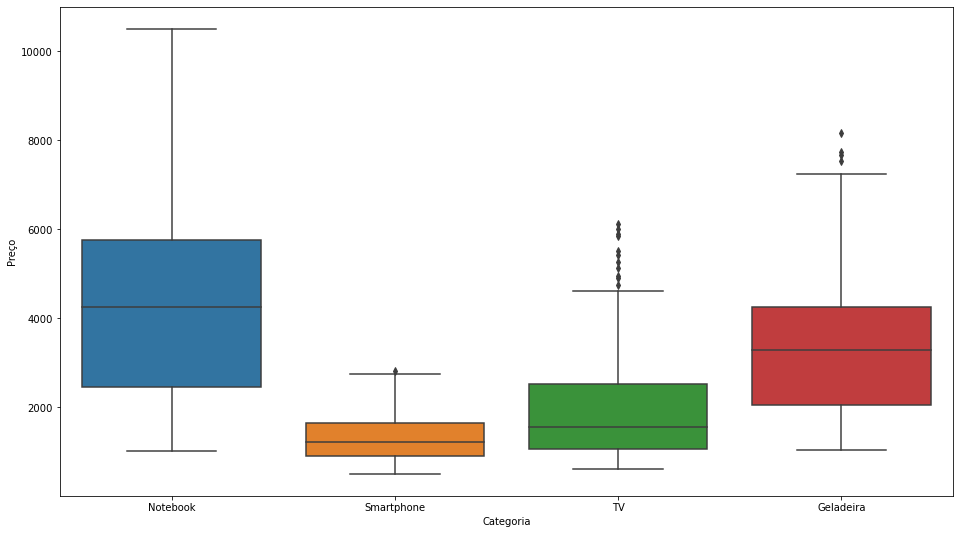

In [472]:
fig = plt.figure(figsize=(16,9))
sns.boxplot(x='Categoria', y='Preço', data=dados_amazon_externo)